In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Fuel_Consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUELCONSUMPTION_COMB(mpg),CO2EMISSIONS(g/km)
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Preprocessing the Data

In [3]:
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINESIZE(L),0
CYLINDERS,0
TRANSMISSION,0
FUEL TYPE,0
FUEL CONSUMPTION in CITY (L/100 km),0
FUEL CONSUMPTION in HWY (L/100 km),0


There are no missing values we can go to the next step

#### Outliers

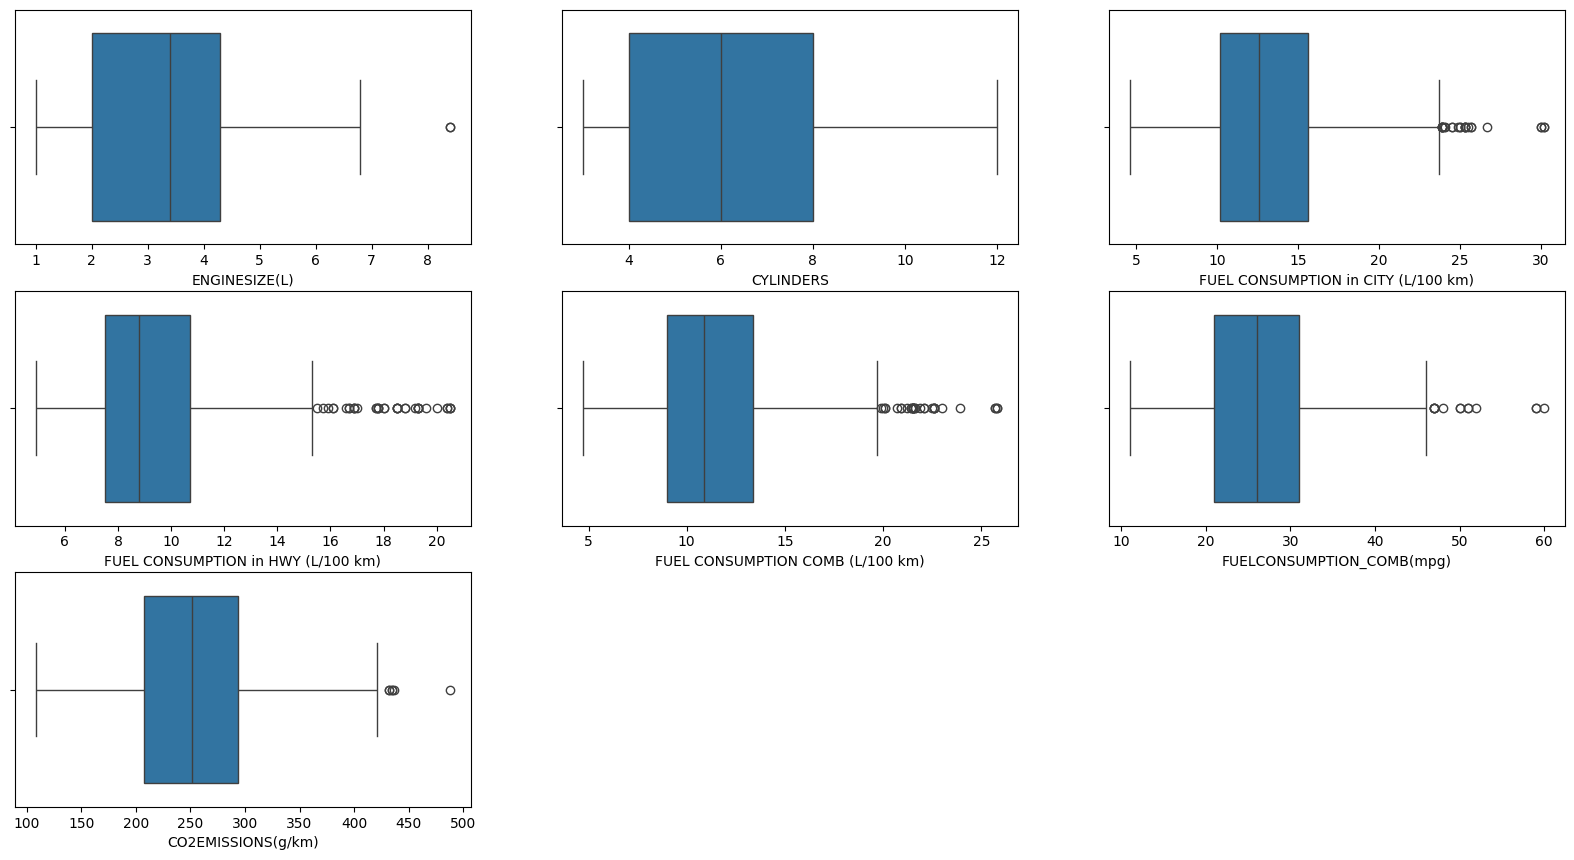

In [4]:
plt.figure(figsize = (20,14))

plt.subplot(4,3,1)
sns.boxplot(x=df['ENGINESIZE(L)'])

plt.subplot(4,3,2)
sns.boxplot(x=df['CYLINDERS'])

plt.subplot(4,3,3)
sns.boxplot(x=df['FUEL CONSUMPTION in CITY (L/100 km)'])

plt.subplot(4,3,4)
sns.boxplot(x=df['FUEL CONSUMPTION in HWY (L/100 km)'])

plt.subplot(4,3,5)
sns.boxplot(x=df['FUEL CONSUMPTION COMB (L/100 km)'])

plt.subplot(4,3,6)
sns.boxplot(x=df['FUELCONSUMPTION_COMB(mpg)'])

plt.subplot(4,3,7)
sns.boxplot(x=df['CO2EMISSIONS(g/km)'])

plt.show()

In [5]:
#removing the outlier

In [6]:
#calculating the Q1 and Q2
Q1 = df['ENGINESIZE(L)'].quantile(0.25)
Q3 = df['ENGINESIZE(L)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['ENGINESIZE(L)'] >= lower_bound) & (df['ENGINESIZE(L)'] <= upper_bound)]

In [7]:
#calculating the Q1 and Q2
Q1 = df['CYLINDERS'].quantile(0.25)
Q3 = df['CYLINDERS'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['CYLINDERS'] >= lower_bound) & (df['CYLINDERS'] <= upper_bound)]

In [8]:
#calculating the Q1 and Q2
Q1 = df['FUEL CONSUMPTION in CITY (L/100 km)'].quantile(0.25)
Q3 = df['FUEL CONSUMPTION in CITY (L/100 km)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['FUEL CONSUMPTION in CITY (L/100 km)'] >= lower_bound) & (df['FUEL CONSUMPTION in CITY (L/100 km)'] <= upper_bound)]

In [9]:
#calculating the Q1 and Q2
Q1 = df['FUEL CONSUMPTION in HWY (L/100 km)'].quantile(0.25)
Q3 = df['FUEL CONSUMPTION in HWY (L/100 km)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['FUEL CONSUMPTION in HWY (L/100 km)'] >= lower_bound) & (df['FUEL CONSUMPTION in HWY (L/100 km)'] <= upper_bound)]

In [10]:
#calculating the Q1 and Q2
Q1 = df['FUEL CONSUMPTION COMB (L/100 km)'].quantile(0.25)
Q3 = df['FUEL CONSUMPTION COMB (L/100 km)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['FUEL CONSUMPTION COMB (L/100 km)'] >= lower_bound) & (df['FUEL CONSUMPTION COMB (L/100 km)'] <= upper_bound)]

In [11]:
#calculating the Q1 and Q2
Q1 = df['FUELCONSUMPTION_COMB(mpg)'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB(mpg)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['FUELCONSUMPTION_COMB(mpg)'] >= lower_bound) & (df['FUELCONSUMPTION_COMB(mpg)'] <= upper_bound)]

In [12]:
#calculating the Q1 and Q2
Q1 = df['CO2EMISSIONS(g/km)'].quantile(0.25)
Q3 = df['CO2EMISSIONS(g/km)'].quantile(0.75)

#calculating the IQR
IQR = Q3 - Q1

#defining the bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df = df[(df['CO2EMISSIONS(g/km)'] >= lower_bound) & (df['CO2EMISSIONS(g/km)'] <= upper_bound)]

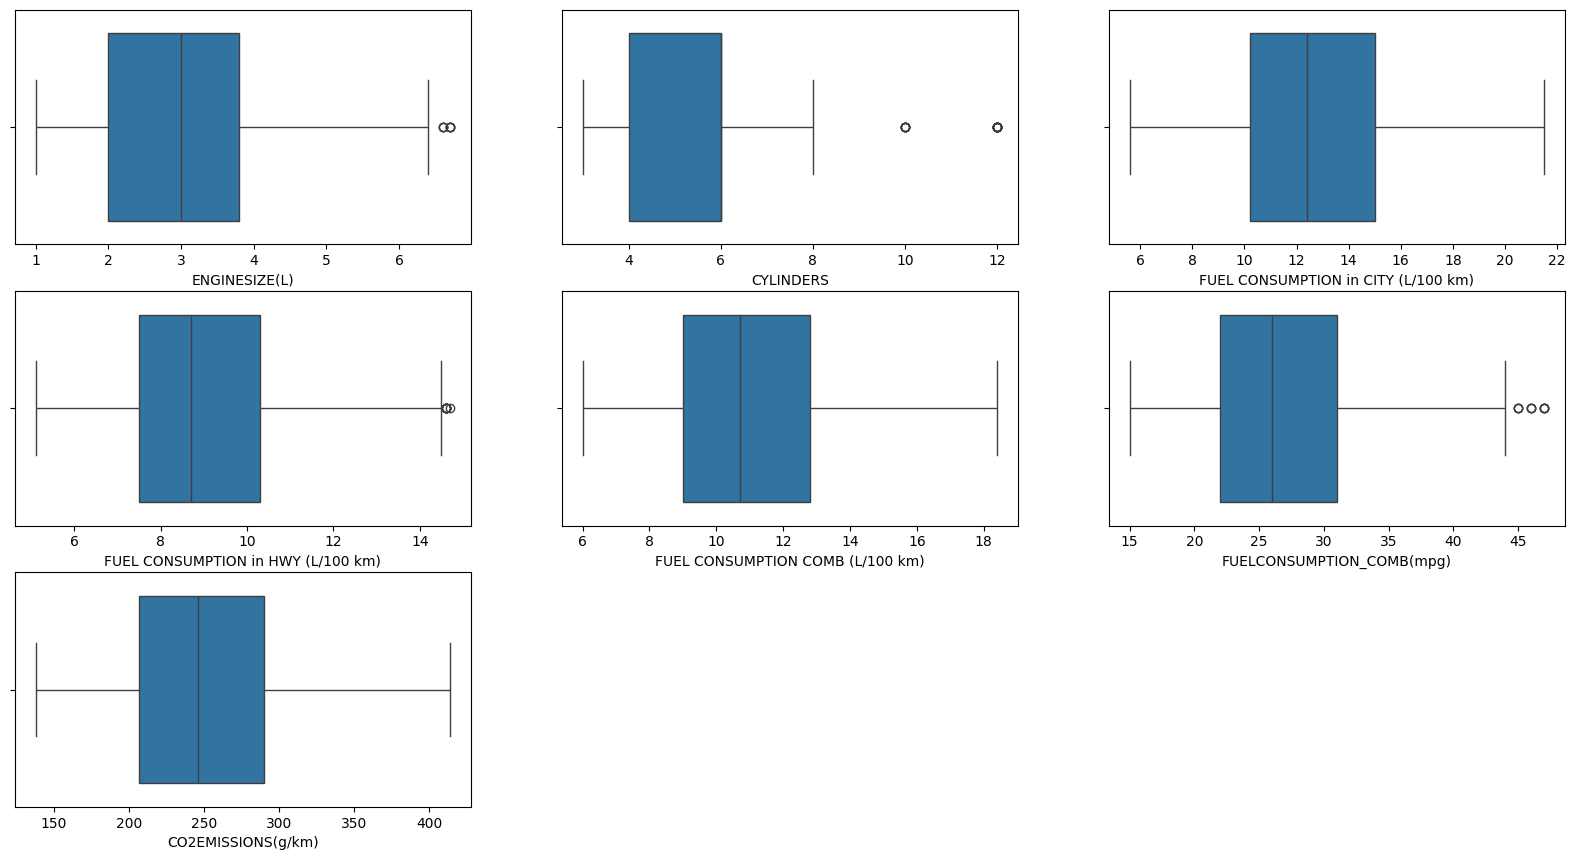

In [13]:
plt.figure(figsize = (20,14))

plt.subplot(4,3,1)
sns.boxplot(x=df['ENGINESIZE(L)'])

plt.subplot(4,3,2)
sns.boxplot(x=df['CYLINDERS'])

plt.subplot(4,3,3)
sns.boxplot(x=df['FUEL CONSUMPTION in CITY (L/100 km)'])

plt.subplot(4,3,4)
sns.boxplot(x=df['FUEL CONSUMPTION in HWY (L/100 km)'])

plt.subplot(4,3,5)
sns.boxplot(x=df['FUEL CONSUMPTION COMB (L/100 km)'])

plt.subplot(4,3,6)
sns.boxplot(x=df['FUELCONSUMPTION_COMB(mpg)'])

plt.subplot(4,3,7)
sns.boxplot(x=df['CO2EMISSIONS(g/km)'])

plt.show()

### Checking the data type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1070
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MODELYEAR                            1008 non-null   int64  
 1   MAKE                                 1008 non-null   object 
 2   MODEL                                1008 non-null   object 
 3   VEHICLE CLASS                        1008 non-null   object 
 4   ENGINESIZE(L)                        1008 non-null   float64
 5   CYLINDERS                            1008 non-null   int64  
 6   TRANSMISSION                         1008 non-null   object 
 7   FUEL TYPE                            1008 non-null   object 
 8   FUEL CONSUMPTION in CITY (L/100 km)  1008 non-null   float64
 9   FUEL CONSUMPTION in HWY (L/100 km)   1008 non-null   float64
 10  FUEL CONSUMPTION COMB (L/100 km)     1008 non-null   float64
 11  FUELCONSUMPTION_COMB(mpg)          

## Data Visualization

#### Distribution of the Engine Size

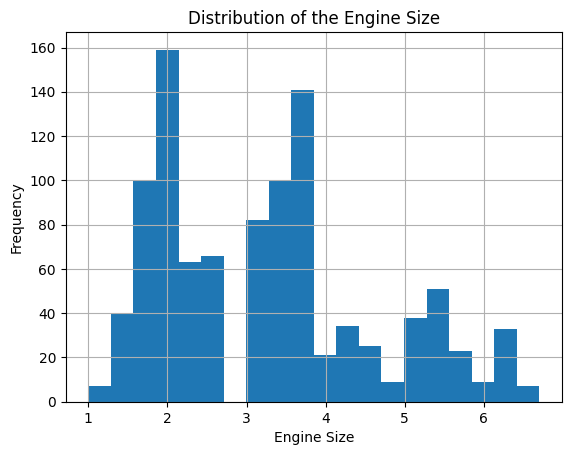

In [15]:
df['ENGINESIZE(L)'].hist(bins = 20)
plt.title('Distribution of the Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()

#### EngineSize Vs Fuel Consumption in city

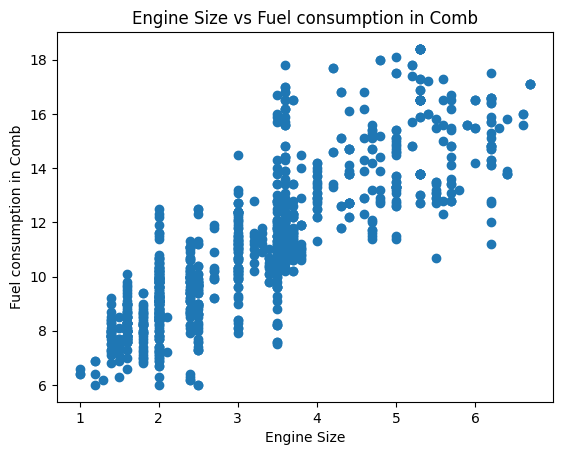

In [16]:
plt.scatter(df['ENGINESIZE(L)'],df['FUEL CONSUMPTION COMB (L/100 km)'])
plt.title('Engine Size vs Fuel consumption in Comb')
plt.xlabel('Engine Size')
plt.ylabel('Fuel consumption in Comb')
plt.show()

#### Fuel consumption in City by vehicle class

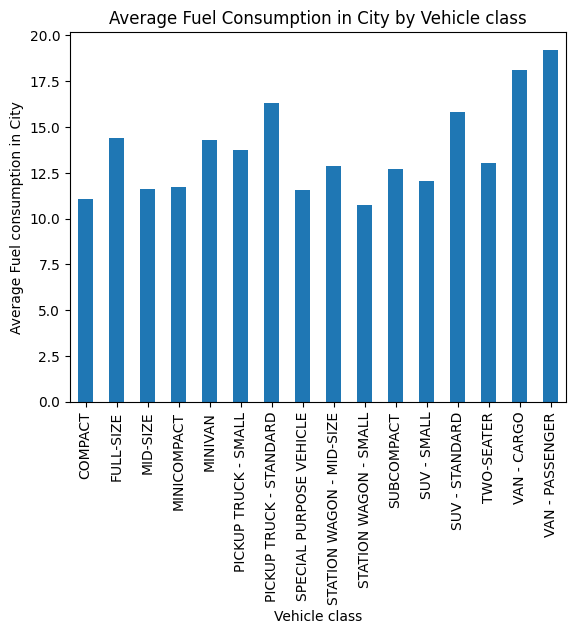

In [17]:
df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION in CITY (L/100 km)'].mean().plot(kind = 'bar')
plt.title('Average Fuel Consumption in City by Vehicle class')
plt.xlabel('Vehicle class')
plt.ylabel('Average Fuel consumption in City')
plt.show()

#### Fuel Consumption in Hwy by Vehicle class

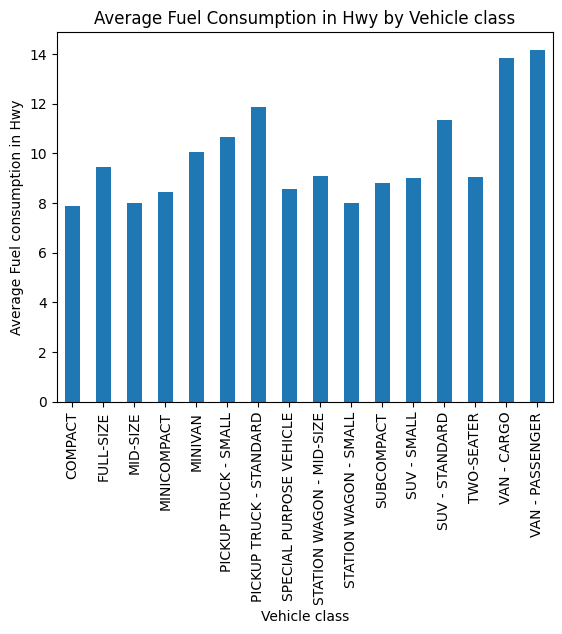

In [18]:
df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION in HWY (L/100 km)'].mean().plot(kind = 'bar')
plt.title('Average Fuel Consumption in Hwy by Vehicle class')
plt.xlabel('Vehicle class')
plt.ylabel('Average Fuel consumption in Hwy')
plt.show()

#### Fuel consumption Comb by vehicle class

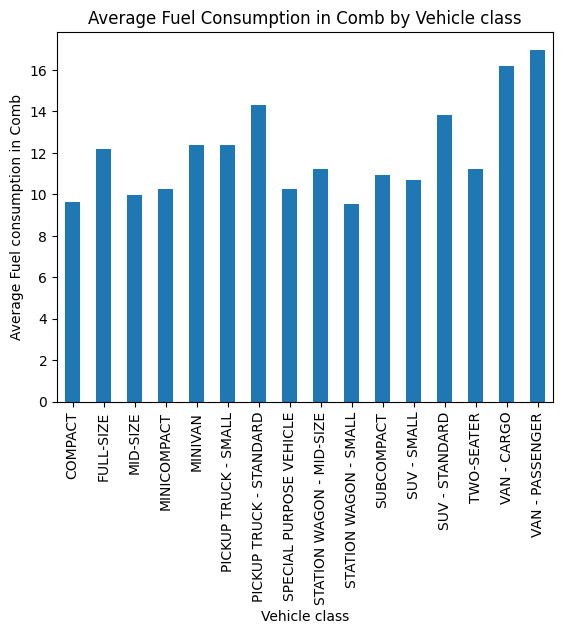

In [19]:
df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION COMB (L/100 km)'].mean().plot(kind = 'bar')
plt.title('Average Fuel Consumption in Comb by Vehicle class')
plt.xlabel('Vehicle class')
plt.ylabel('Average Fuel consumption in Comb')
plt.show()

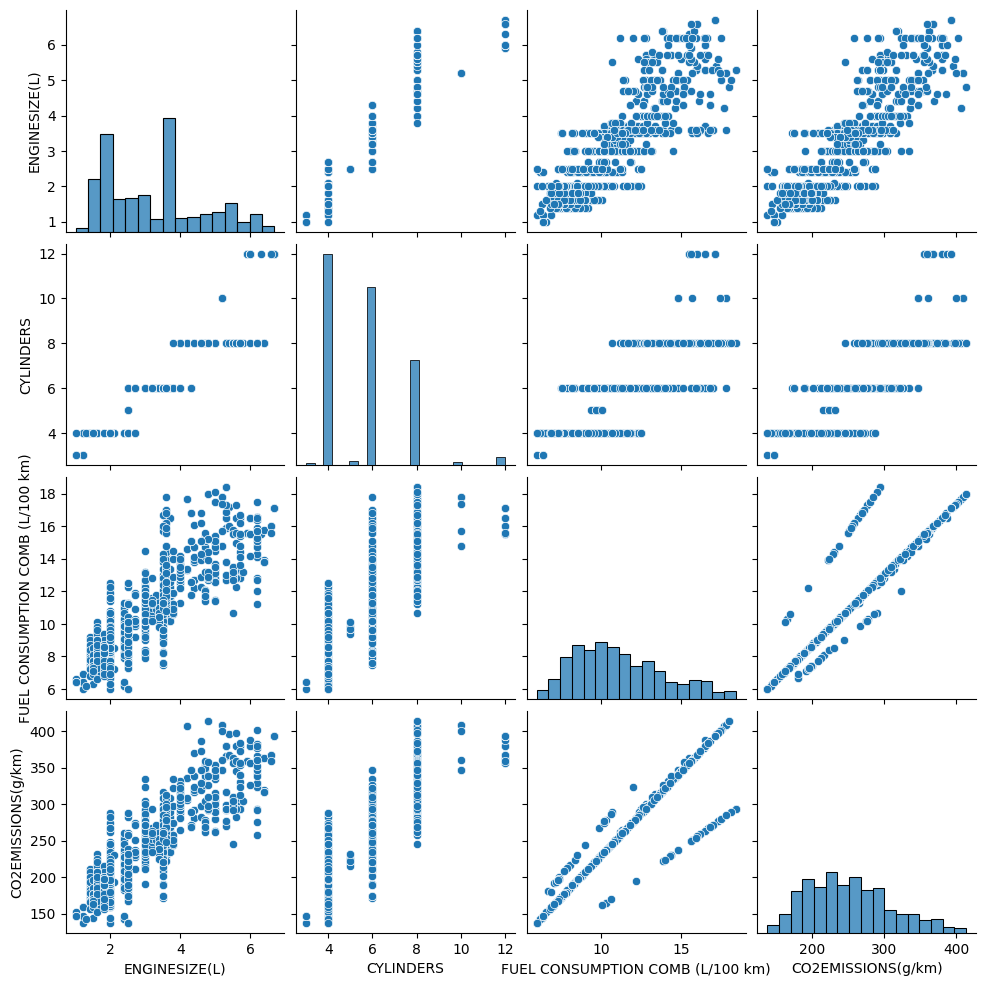

In [20]:
sns.pairplot(df[['ENGINESIZE(L)','CYLINDERS','FUEL CONSUMPTION COMB (L/100 km)','CO2EMISSIONS(g/km)']])
plt.show()

#### Average Fuel consumption in comb by fuel type

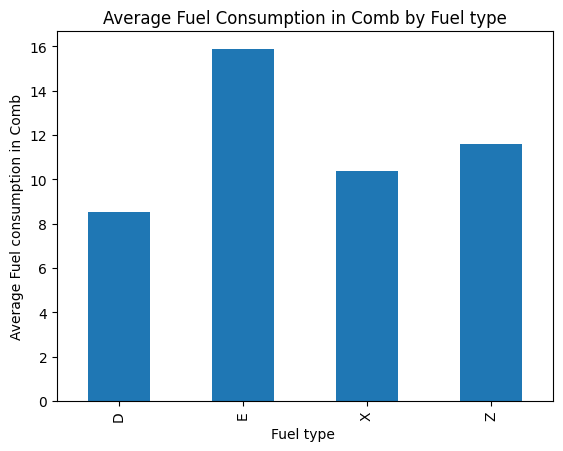

In [21]:
df.groupby('FUEL TYPE')['FUEL CONSUMPTION COMB (L/100 km)'].mean().plot(kind = 'bar')
plt.title('Average Fuel Consumption in Comb by Fuel type')
plt.xlabel('Fuel type ')
plt.ylabel('Average Fuel consumption in Comb')
plt.show()

We can see the averge fuel consumption is more in Ethonal fuel type

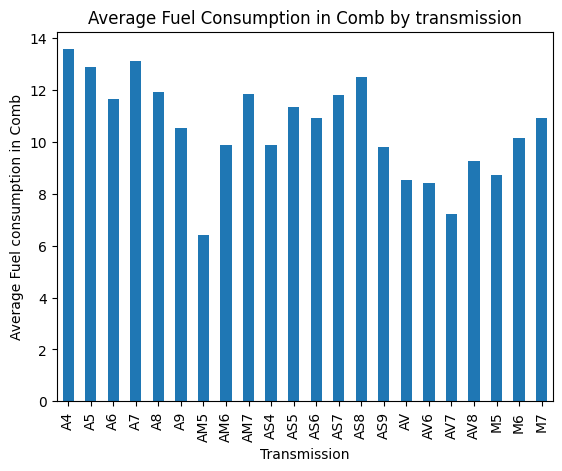

In [22]:
df.groupby('TRANSMISSION')['FUEL CONSUMPTION COMB (L/100 km)'].mean().plot(kind = 'bar')
plt.title('Average Fuel Consumption in Comb by transmission')
plt.xlabel('Transmission')
plt.ylabel('Average Fuel consumption in Comb')
plt.show()

In [23]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINESIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION in CITY (L/100 km)',
       'FUEL CONSUMPTION in HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUELCONSUMPTION_COMB(mpg)',
       'CO2EMISSIONS(g/km)'],
      dtype='object')

In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUELCONSUMPTION_COMB(mpg),CO2EMISSIONS(g/km)
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


In [25]:
df = df.drop(['MODELYEAR','MAKE','MODEL','ENGINESIZE(L)','FUEL CONSUMPTION in CITY (L/100 km)','FUEL CONSUMPTION in HWY (L/100 km)','FUELCONSUMPTION_COMB(mpg)'],axis = 1)

In [26]:
df = df.drop('CO2EMISSIONS(g/km)',axis = 1)

In [27]:
df.head()

,VEHICLE CLASS,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION COMB (L/100 km)
0,COMPACT,4,AS5,Z,8.5
1,COMPACT,4,M6,Z,9.6
3,SUV - SMALL,6,AS6,Z,11.1
4,SUV - SMALL,6,AS6,Z,10.6
5,MID-SIZE,6,AS6,Z,10.0


### Converting the categorical variable

In [28]:
dummy_vehicleclass = pd.get_dummies(df['VEHICLE CLASS'], drop_first=True)
dummy_vehicleclass = dummy_vehicleclass.astype(int)
df = pd.concat([df,dummy_vehicleclass], axis = 1)
df = df.drop('VEHICLE CLASS', axis=1)

dummy_Transmission = pd.get_dummies(df['TRANSMISSION'],drop_first = True)
dummy_Transmission = dummy_Transmission.astype(int)
df = pd.concat([df,dummy_Transmission],axis=1)
df = df.drop('TRANSMISSION',axis=1)

dummy_FuelType = pd.get_dummies(df['FUEL TYPE'], drop_first=True)
dummy_FuelType = dummy_FuelType.astype(int)
df = pd.concat([df,dummy_FuelType],axis=1)
df = df.drop('FUEL TYPE', axis=1)

In [29]:
df.head()

,CYLINDERS,FUEL CONSUMPTION COMB (L/100 km),FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
0,4,8.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,9.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,6,11.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,10.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,10.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We have converted the catergorical values to numerical we will move to the machine learning part

#### Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(705, 41)
(303, 41)


#### Resacling the features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

num_vars = ['CYLINDERS','FUEL CONSUMPTION COMB (L/100 km)']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,CYLINDERS,FUEL CONSUMPTION COMB (L/100 km),FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
557,0.555556,0.927419,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
593,0.111111,0.306452,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
113,0.333333,0.185484,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
547,0.333333,0.346774,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107,0.555556,0.500000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_train[num_vars].describe()

,CYLINDERS,FUEL CONSUMPTION COMB (L/100 km)
count,705.000000,705.000000
mean,0.298818,0.412663
std,0.193131,0.222189
min,0.000000,0.000000
25%,0.111111,0.233871
50%,0.333333,0.379032
75%,0.333333,0.548387
max,1.000000,1.000000


### Linear Regression

#### using Statsmodel

In [35]:
X_train = df_train
y_train = df_train.pop('FUEL CONSUMPTION COMB (L/100 km)')

In [36]:
X_train.head()

,CYLINDERS,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
557,0.555556,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
593,0.111111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
113,0.333333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
547,0.333333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107,0.555556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [38]:
X_train_sm = sm.add_constant(X_train)

In [39]:
lr_1 = sm.OLS(y_train,X_train_sm).fit()

In [40]:
lr_1.params

,0
const,-7.054615e-02
CYLINDERS,7.900921e-01
FULL-SIZE,2.282089e-02
MID-SIZE,-9.721911e-03
MINICOMPACT,-2.827290e-02
MINIVAN,1.095884e-01
PICKUP TRUCK - SMALL,2.064122e-01
PICKUP TRUCK - STANDARD,1.683269e-01
SPECIAL PURPOSE VEHICLE,1.405377e-01
STATION WAGON - MID-SIZE,3.958412e-02


In [41]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     FUEL CONSUMPTION COMB (L/100 km)   R-squared:                       0.880
Model:                                          OLS   Adj. R-squared:                  0.873
Method:                               Least Squares   F-statistic:                     124.8
Date:                              Wed, 22 Jan 2025   Prob (F-statistic):          3.27e-277
Time:                                      12:55:40   Log-Likelihood:                 807.36
No. Observations:                               705   AIC:                            -1535.
Df Residuals:                                   665   BIC:                            -1352.
Df Model:                                        39                                         
Covariance Type:                          nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0705      0.040     -1.746      0.081      -0.150       0.009
CYLINDERS                    0.7901      0.021     38.108      0.000       0.749       0.831
FULL-SIZE                    0.0228      0.014      1.585      0.114      -0.005       0.051
MID-SIZE                    -0.0097      0.011     -0.856      0.392      -0.032       0.013
MINICOMPACT                 -0.0283      0.018     -1.589      0.113      -0.063       0.007
MINIVAN                      0.1096      0.026      4.212      0.000       0.059       0.161
PICKUP TRUCK - SMALL         0.2064      0.029      7.147      0.000       0.150       0.263
PICKUP TRUCK - STANDARD      0.1683      0.017     10.103      0.000       0.136       0.201
SPECIAL PURPOSE VEHICLE      0.1405      0.037      3.796      0.000       0.068       0.213
STATION WAGON - MID-SIZE     0.0396      0.037      1.069      0.286      -0.033       0.112
STATION WAGON - SMALL        0.0557      0.017      3.188      0.001       0.021       0.090
SUBCOMPACT                  -0.0044      0.014     -0.312      0.755      -0.032       0.023
SUV - SMALL                  0.1116      0.012      9.482      0.000       0.088       0.135
SUV - STANDARD               0.1470      0.013     11.262      0.000       0.121       0.173
TWO-SEATER                   0.0056      0.015      0.385      0.700      -0.023       0.034
VAN - CARGO                  0.3727      0.044      8.493      0.000       0.287       0.459
VAN - PASSENGER              0.3762      0.046      8.211      0.000       0.286       0.466
A5                           0.1011      0.038      2.648      0.008       0.026       0.176
A6                           0.0509      0.034      1.492      0.136      -0.016       0.118
A7                           0.0507      0.046      1.097      0.273      -0.040       0.141
A8                          -0.0104      0.036     -0.291      0.771      -0.081       0.060
A9                           0.0250      0.047      0.527      0.598      -0.068       0.118
AM5                         -0.0681      0.067     -1.019      0.308      -0.199       0.063
AM6                          0.0938      0.047      2.014      0.044       0.002       0.185
AM7                          0.0651      0.039      1.686      0.092      -0.011       0.141
AS4                      -5.818e-17   3.82e-17     -1.524      0.128   -1.33e-16    1.68e-17
AS5                          0.0836      0.044      1.903      0.057      -0.003       0.170
AS6                          0.0540      0.034      1.572      0.116      -0.013       0.121
AS7                          0.0285      0.037

#### calculating the VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,X,19.97
39,Z,17.43
26,AS6,8.72
17,A6,8.53
0,CYLINDERS,6.10
35,M6,6.09
19,A8,4.48
28,AS8,4.16
27,AS7,3.62
34,M5,3.18


In [44]:
X_train = X_train.drop(['AM7','M6','A7','MID-SIZE','SUBCOMPACT','STATION WAGON - MID-SIZE','AS4','AS5','M7','AS9','A9','AS8','AS6','AM5','A6','TWO-SEATER','MINICOMPACT'], axis = 1)

In [45]:
X_train_sm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train,X_train_sm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     FUEL CONSUMPTION COMB (L/100 km)   R-squared:                       0.876
Model:                                          OLS   Adj. R-squared:                  0.872
Method:                               Least Squares   F-statistic:                     208.9
Date:                              Wed, 22 Jan 2025   Prob (F-statistic):          3.05e-290
Time:                                      12:55:41   Log-Likelihood:                 796.01
No. Observations:                               705   AIC:                            -1544.
Df Residuals:                                   681   BIC:                            -1435.
Df Model:                                        23                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0238      0.022     -1.086      0.278      -0.067       0.019
CYLINDERS                   0.7864      0.020     40.035      0.000       0.748       0.825
FULL-SIZE                   0.0259      0.012      2.101      0.036       0.002       0.050
MINIVAN                     0.1162      0.025      4.661      0.000       0.067       0.165
PICKUP TRUCK - SMALL        0.2084      0.028      7.429      0.000       0.153       0.264
PICKUP TRUCK - STANDARD     0.1723      0.015     11.550      0.000       0.143       0.202
SPECIAL PURPOSE VEHICLE     0.1440      0.036      3.973      0.000       0.073       0.215
STATION WAGON - SMALL       0.0592      0.016      3.593      0.000       0.027       0.091
SUV - SMALL                 0.1142      0.010     12.004      0.000       0.096       0.133
SUV - STANDARD              0.1498      0.011     13.840      0.000       0.129       0.171
VAN - CARGO                 0.3234      0.028     11.496      0.000       0.268       0.379
VAN - PASSENGER             0.3371      0.037      9.137      0.000       0.265       0.410
A5                          0.0475      0.019      2.472      0.014       0.010       0.085
A8                         -0.0626      0.011     -5.509      0.000      -0.085      -0.040
AM6                         0.0410      0.033      1.244      0.214      -0.024       0.106
AS7                        -0.0213      0.013     -1.666      0.096      -0.046       0.004
AV                         -0.0850      0.015     -5.627      0.000      -0.115      -0.055
AV6                        -0.1643      0.031     -5.385      0.000      -0.224      -0.104
AV7                        -0.0513      0.057     -0.905      0.366      -0.163       0.060
AV8                        -0.2794      0.080     -3.502      0.000      -0.436      -0.123
M5                         -0.0090      0.014     -0.634      0.527      -0.037       0.019
E                           0.4578      0.026     17.742      0.000       0.407       0.508
X                           0.1207      0.022      5.513      0.000       0.078       0.164
Z                           0.1701      0.022      7.805      0.000       0.127       0.213
==============================================================================
Omnibus:                       77.103   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.167
Skew:                           0.665   Prob(JB):                     2.46e-33
Kurtosis:                       4.828   Cond. No.                         33.8
==================================================

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CYLINDERS,5.34
22,Z,3.24
21,X,3.04
7,SUV - SMALL,1.48
1,FULL-SIZE,1.44
8,SUV - STANDARD,1.42
4,PICKUP TRUCK - STANDARD,1.36
12,A8,1.31
20,E,1.27
19,M5,1.20


In [47]:
X_train = X_train.drop('AS7', axis = 1)

In [48]:
X_train_sm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train,X_train_sm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     FUEL CONSUMPTION COMB (L/100 km)   R-squared:                       0.875
Model:                                          OLS   Adj. R-squared:                  0.871
Method:                               Least Squares   F-statistic:                     217.7
Date:                              Wed, 22 Jan 2025   Prob (F-statistic):          8.12e-291
Time:                                      12:55:41   Log-Likelihood:                 794.58
No. Observations:                               705   AIC:                            -1543.
Df Residuals:                                   682   BIC:                            -1438.
Df Model:                                        22                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0287      0.022     -1.324      0.186      -0.071       0.014
CYLINDERS                   0.7836      0.020     39.986      0.000       0.745       0.822
FULL-SIZE                   0.0267      0.012      2.164      0.031       0.002       0.051
MINIVAN                     0.1171      0.025      4.692      0.000       0.068       0.166
PICKUP TRUCK - SMALL        0.2086      0.028      7.427      0.000       0.153       0.264
PICKUP TRUCK - STANDARD     0.1736      0.015     11.633      0.000       0.144       0.203
SPECIAL PURPOSE VEHICLE     0.1442      0.036      3.973      0.000       0.073       0.215
STATION WAGON - SMALL       0.0596      0.016      3.614      0.000       0.027       0.092
SUV - SMALL                 0.1148      0.010     12.057      0.000       0.096       0.133
SUV - STANDARD              0.1499      0.011     13.833      0.000       0.129       0.171
VAN - CARGO                 0.3249      0.028     11.540      0.000       0.270       0.380
VAN - PASSENGER             0.3387      0.037      9.171      0.000       0.266       0.411
A5                          0.0484      0.019      2.520      0.012       0.011       0.086
A8                         -0.0598      0.011     -5.314      0.000      -0.082      -0.038
AM6                         0.0426      0.033      1.292      0.197      -0.022       0.107
AV                         -0.0845      0.015     -5.585      0.000      -0.114      -0.055
AV6                        -0.1635      0.031     -5.354      0.000      -0.224      -0.104
AV7                        -0.0510      0.057     -0.898      0.370      -0.162       0.060
AV8                        -0.2760      0.080     -3.455      0.001      -0.433      -0.119
M5                         -0.0086      0.014     -0.604      0.546      -0.036       0.019
E                           0.4620      0.026     17.970      0.000       0.412       0.513
X                           0.1257      0.022      5.786      0.000       0.083       0.168
Z                           0.1725      0.022      7.924      0.000       0.130       0.215
==============================================================================
Omnibus:                       77.288   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.994
Skew:                           0.663   Prob(JB):                     9.88e-34
Kurtosis:                       4.848   Cond. No.                         33.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix o

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CYLINDERS,5.29
21,Z,3.16
20,X,3.04
7,SUV - SMALL,1.48
1,FULL-SIZE,1.43
8,SUV - STANDARD,1.42
4,PICKUP TRUCK - STANDARD,1.36
12,A8,1.29
19,E,1.27
18,M5,1.20


### Residual Analysis

In [50]:
y_train_pred = lr_3.predict(X_train_sm)

<Axes: ylabel='Density'>

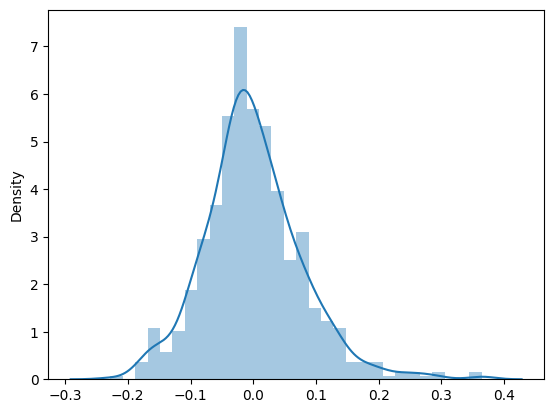

In [51]:
res = y_train - y_train_pred
sns.distplot(res)

### Predictions and evaluation on the test set

In [52]:
num_vars = ['CYLINDERS','FUEL CONSUMPTION COMB (L/100 km)']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,CYLINDERS,FUEL CONSUMPTION COMB (L/100 km),FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
265,0.555556,0.629032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
606,0.111111,0.193548,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
585,0.555556,0.709677,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
865,0.111111,0.048387,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
525,0.111111,0.201613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [53]:
df_test.describe()

,CYLINDERS,FUEL CONSUMPTION COMB (L/100 km),FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.298130,0.421005,0.085809,0.217822,0.046205,0.009901,0.009901,0.046205,0.006601,0.0,...,0.033003,0.013201,0.006601,0.006601,0.033003,0.148515,0.009901,0.075908,0.495050,0.392739
std,0.200521,0.231379,0.280545,0.413448,0.210275,0.099174,0.099174,0.210275,0.081110,0.0,...,0.178941,0.114325,0.081110,0.081110,0.178941,0.356198,0.099174,0.265288,0.500803,0.489168
min,0.111111,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.241935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.379032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.548387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test = df_test.pop('FUEL CONSUMPTION COMB (L/100 km)')
X_test = df_test

In [55]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,CYLINDERS,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,AV,AV6,AV7,AV8,M5,M6,M7,E,X,Z
265,1.0,0.555556,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
606,1.0,0.111111,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
585,1.0,0.555556,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
865,1.0,0.111111,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
525,1.0,0.111111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


#### Remvoing the features we removed in the train set

In [56]:
X_test_sm = X_test_sm.drop(['AM7','M6','A7','MID-SIZE','SUBCOMPACT','STATION WAGON - MID-SIZE','AS4','AS5','M7','AS9','A9','AS8','AS6','AM5','A6','TWO-SEATER','MINICOMPACT','AS7'], axis = 1)

#### Predict

In [57]:
y_pred = lr_3.predict(X_test_sm)

#### Evaluation

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score = r2_score(y_test,y_pred)
r2_score

0.8665998115399574

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_test,y_pred)

0.007118145735616182

In [61]:
'''Fuel Consumption Prediction using Linear Regression

Description: This project aims to predict fuel consumption using linear regression techniques. It utilizes a dataset containing various attributes such as engine size, number of cylinders, and fuel consumption in combined both city and highway. The dataset undergoes preprocessing steps including handling outliers and converting categorical variables to numerical format.

Key Steps:

Data Preprocessing:

Checked for missing values and outliers.
Visualized the distributions of numerical variables and identified outliers using box plots.
Removed outliers using the IQR method.
Data Visualization:

Explored the distribution of engine size and fuel consumption.
Analyzed the relationship between engine size and fuel consumption.
Investigated average fuel consumption by vehicle class, transmission type, and fuel type.
Feature Engineering:

Converted categorical variables (vehicle class, transmission, fuel type) into numerical format using one-hot encoding.
Removed irrelevant columns and prepared the data for machine learning.
Model Building:

Split the dataset into training and testing sets.
Applied linear regression using both Statsmodels and scikit-learn.
Conducted feature selection using Recursive Feature Elimination (RFE) to identify the most significant features.
Model Evaluation:

Evaluated model performance using metrics such as ( R^2 ) score and mean squared error (MSE).
Conducted residual analysis to assess model assumptions and check for normality.
Technologies Used:

Python
Pandas
NumPy
Matplotlib
Seaborn
Statsmodels
RFE
Scikit-learn '''
